In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import root_scalar
from open_atmos_jupyter_utils import show_plot

In [ ]:
def f(x0, t, xi):
    return x0 - np.sin(np.pi*x0)*t - xi

def df(x0, t, _):
    return 1 - np.cos(np.pi*x0)*np.pi*t

In [3]:
x = np.linspace(-1, 1, 200)
t_range = [0, 0.1, 0.3, 0.5, 0.7, 1]
tshock = 1 / np.pi
u = np.zeros((len(x), len(t_range)))

In [4]:
def find_root(x0, t, xi):
    return root_scalar(f, args=(t, xi), x0=x0, method='newton', maxiter=200, fprime=df).root

In [5]:
for j, t in enumerate(t_range):
    for i, xi in enumerate(x):
        if t < tshock:
            x0 = find_root(x0=0, t=t, xi=xi)
            u[i, j] = -np.sin(np.pi * x0)
        else:
            if xi == 0:
                u[i, j] = 0
            else:
                x0 = find_root(x0=xi/abs(xi), t=t, xi=xi)
                u[i, j] = -np.sin(np.pi * x0)

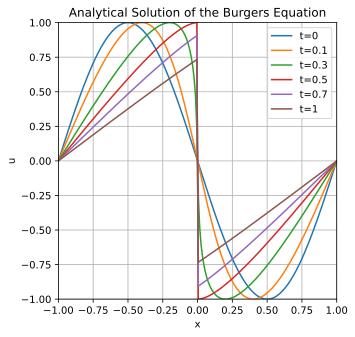

In [ ]:
fig = plt.figure(figsize=(5, 5))
plt.plot(x, u)
plt.xlabel('x')
plt.ylabel('u')
plt.xlim([-1, 1])
plt.ylim([-1, 1])
plt.title('Analytical Solution of the Burgers Equation')
plt.legend([f't={t}' for t in t_range])
plt.grid(True)
show_plot(fig=fig, filename='analytical')